In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

<h5 style="color: SkyBlue;">Load Dataset</h5>

In [3]:
df = pd.read_csv('user_data_for_disease_prediction - unclassified data set.csv')
print(df.head())

   Heart Rate (bpm)  Breathing Rate (brpm)  Oxygen Saturation (%)  \
0              80.3                   12.2                   96.4   
1              73.1                   17.7                   95.9   
2              72.2                   18.0                   96.0   
3              70.6                   14.7                   95.1   
4              99.5                   19.5                   97.6   

   Blood Pressure (systolic)  Blood Pressure (diastolic)  Stress Index  \
0                      107.3                        74.2          39.6   
1                       92.4                        70.8          98.7   
2                      102.4                        75.6          45.3   
3                      110.0                        62.2          77.8   
4                      110.2                        73.0          57.3   

   Recovery Ability  PNS Index  SNS Index  RMSSD (ms)  SD2 (ms)  \
0                 0       -0.9        0.4        49.7      67.9   
1     

In [4]:
# missing values
print(df.isnull().sum())

# features (X) and target (y)
X = df.drop('Gender (0-M;1-F)', axis=1)
y = df['Gender (0-M;1-F)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardise data for Logistic Regression and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Heart Rate (bpm)              0
Breathing Rate (brpm)         0
Oxygen Saturation (%)         0
Blood Pressure (systolic)     0
Blood Pressure (diastolic)    0
Stress Index                  0
Recovery Ability              0
PNS Index                     0
SNS Index                     0
RMSSD (ms)                    0
SD2 (ms)                      0
Hemoglobin A1c (%)            0
Mean RRi (ms)                 0
SD1 (ms)                      0
HRV SDNN (ms)                 0
Hemoglobin (g/dl)             0
Gender (0-M;1-F)              0
dtype: int64


<h5 style="color: SkyBlue;">Logistic Regression</h5>

c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using DummyClassifier for CFS (only one class: [1])


c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Using DummyClassifier for Hypertension (only one class: [1])


c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

                   Disease  Precision    Recall  F1-score  Accuracy
0           Cardiovascular   0.969781  0.968120  0.968950  0.944509
1              Respiratory   0.989919  0.993593  0.991752  0.984060
2                      CFS   1.000000  1.000000  1.000000  1.000000
3               Arrhythmia   0.999478  1.000000  0.999739  0.999478
4                 Diabetes   0.934791  0.930662  0.932722  0.918758
5             Hypertension   1.000000  1.000000  1.000000  1.000000
6                  Anaemia   0.959741  0.965553  0.962638  0.937984
7          Atherosclerosis   0.923112  0.941894  0.932409  0.902380
8    Autonomic Dysfunction   0.939976  0.954580  0.947222  0.921233
9  Stress Related Disorder   0.955946  0.949611  0.952768  0.963727


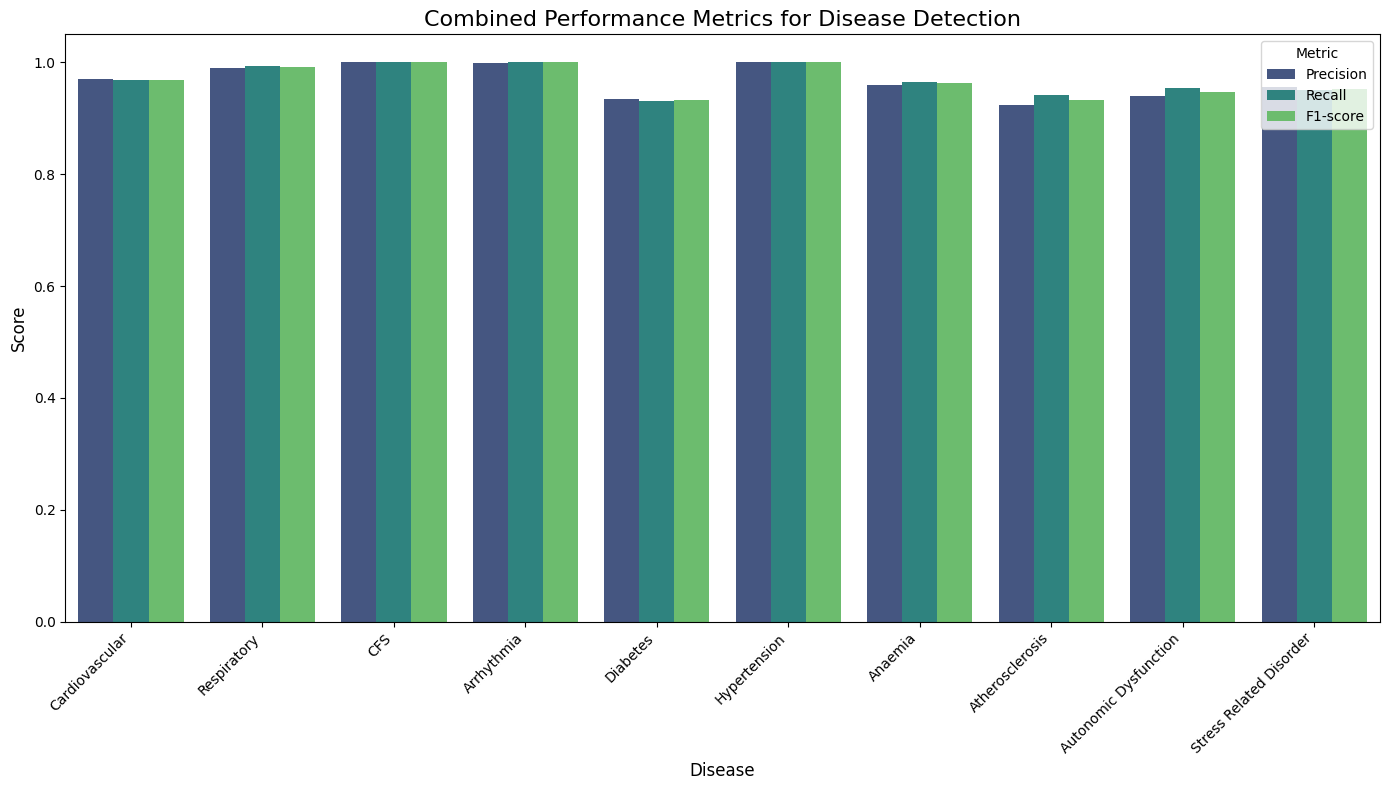

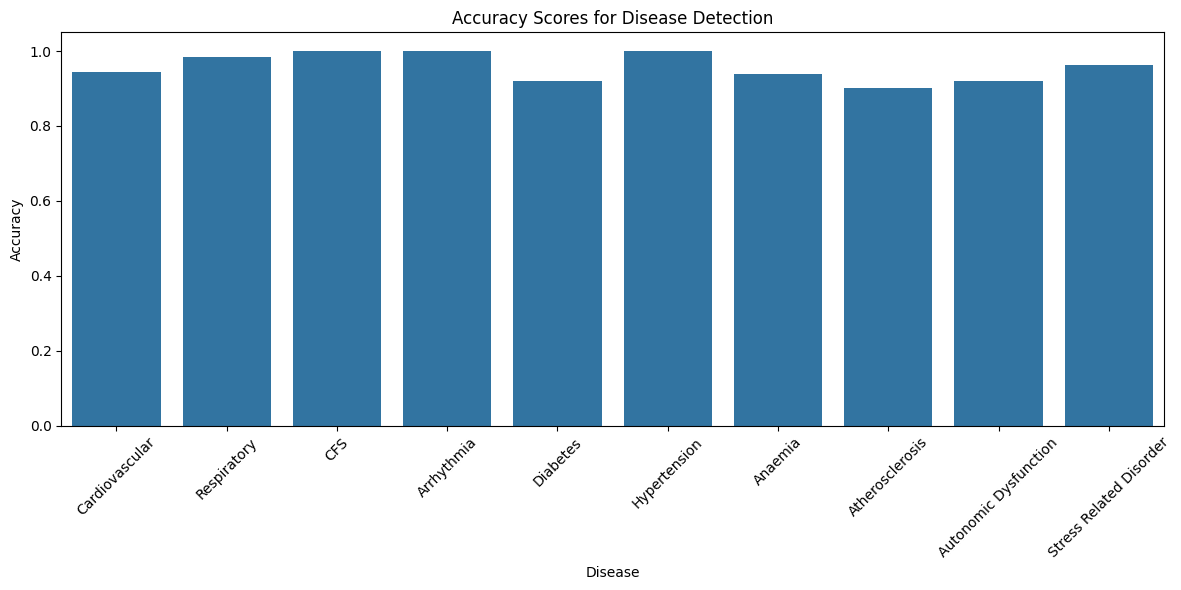

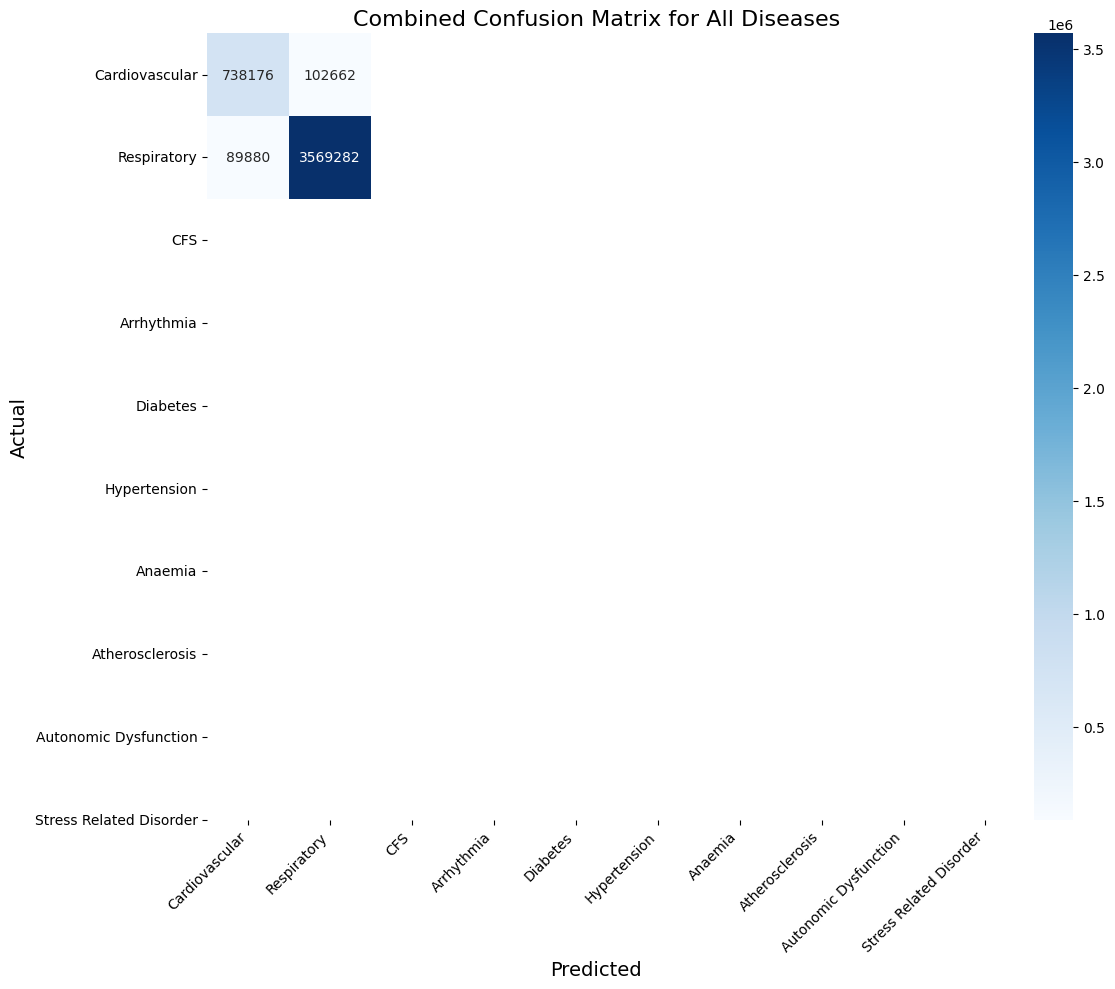

In [5]:
def detect_cardiovascular(row):
    gender = row['Gender (0-M;1-F)']
    return int(
        70 <= row['Heart Rate (bpm)'] <= 80 or 
        row['Blood Pressure (systolic)'] >= 140 or 
        row['Blood Pressure (diastolic)'] >= 90 or 
        row['Oxygen Saturation (%)'] < 90 or 
        1.22 <= row['Stress Index'] <= 4.53 or 
        row['HRV SDNN (ms)'] < 50 or 
        (row['Hemoglobin (g/dl)'] < 13 if gender == 0 else row['Hemoglobin (g/dl)'] < 12) or
        row['Hemoglobin A1c (%)'] >= 6.5
    )

def detect_respiratory(row):
    return int(
        row['Breathing Rate (brpm)'] > 15 or 
        row['Oxygen Saturation (%)'] < 88 or 
        row['Heart Rate (bpm)'] > 80 or 
        row['Stress Index'] < 0.7 
    )

def detect_cfs(row):
    return int(
        row['RMSSD (ms)'] < 20 or 
        row['SD1 (ms)'] < 30 or 
        row['Recovery Ability'] < 60 or 
        row['Mean RRI (ms)'] < 800
    )

def detect_arrhythmia(row):
    return int(
        row['Heart Rate (bpm)'] > 120 or row['Heart Rate (bpm)'] < 50 or 
        row['RMSSD (ms)'] < 20 or 
        row['SD2 (ms)'] < 70 or 
        row['HRV SDNN (ms)'] < 50 
        # row['LF/HF'] > 2.0
    )

def detect_diabetes(row):
    return int(
        row['Hemoglobin A1c (%)'] >= 6.5 or 
        row['Hemoglobin (g/dl)'] < 12
    )

def detect_hypertension(row):
    return int(
        row['Heart Rate (bpm)'] > 80 or 
        row['Hemoglobin A1c (%)'] >= 6.5 or 
        row['HRV SDNN (ms)'] < 100
    )

def detect_anaemia(row):
    gender = row['Gender (0-M;1-F)']
    return int(
        row['Heart Rate (bpm)'] > 100 or 
        (row['Hemoglobin (g/dl)'] < 13 if gender else row['Hemoglobin (g/dl)'] < 12) or 
        row['RMSSD (ms)'] < 20 or 
        row['SD2 (ms)'] < 50  
        # row['LF/HF'] > 2.5
    )

def detect_atherosclerosis(row):
    return int(
        row['Heart Rate (bpm)'] > 100 or 
        row['Hemoglobin A1c (%)'] > 6.5 or 
        row['RMSSD (ms)'] < 20 
        # row['LF/HF'] > 2.5
    )

def detect_autonomic_dysfunction(row):
    return int(
        row['Heart Rate (bpm)'] > 100 or 
        row['SD1 (ms)'] < 20 or 
        row['RMSSD (ms)'] < 20 or 
        row['HRV SDNN (ms)'] < 50
    )

def detect_stress_related_disorder(row):
    gender = row.get('Gender (0-M;1-F)')
    return int(
        # row['LF/HF'] > 2.5 or 
        row['Hemoglobin A1c (%)'] > 6.5
    )

df['Cardiovascular'] = df.apply(detect_cardiovascular, axis=1)
df['Respiratory'] = df.apply(detect_respiratory, axis=1)
df['CFS'] = df.apply(detect_cfs, axis=1)
df['Arrhythmia'] = df.apply(detect_arrhythmia, axis=1)
df['Diabetes'] = df.apply(detect_diabetes, axis=1)
df['Hypertension'] = df.apply(detect_hypertension, axis=1)
df['Anaemia'] = df.apply(detect_anaemia, axis=1)
df['Atherosclerosis'] = df.apply(detect_atherosclerosis, axis=1)
df['Autonomic Dysfunction'] = df.apply(detect_autonomic_dysfunction, axis=1)
df['Stress Related Disorder'] = df.apply(detect_stress_related_disorder, axis=1)

classification_reports = {}
accuracy_scores = {}
all_y_true = []
all_y_pred = []

def train_logistic_regression(X, y, disease_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000, class_weight='balanced')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    classification_reports[disease_name] = classification_report(y_test, y_pred, output_dict=True)
    accuracy_scores[disease_name] = accuracy_score(y_test, y_pred)
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

X = df.drop(['Cardiovascular', 'Respiratory', 'CFS', 'Arrhythmia', 'Diabetes',
             'Hypertension', 'Anaemia', 'Atherosclerosis', 'Autonomic Dysfunction',
             'Stress Related Disorder'], axis=1)

for disease in ['Cardiovascular', 'Respiratory', 'CFS', 'Arrhythmia', 'Diabetes',
                'Hypertension', 'Anaemia', 'Atherosclerosis', 'Autonomic Dysfunction',
                'Stress Related Disorder']:
    
    y = df[disease] 

    if len(y.unique()) < 2:  # single-class case
        print(f"Using DummyClassifier for {disease} (only one class: {y.unique()})")
        model = DummyClassifier(strategy='most_frequent')
    else:
        model = LogisticRegression(max_iter=1000)  # standard logistic regression for two-class cases

    model.fit(X, y)  # Train the model (or dummy classifier)

    y_pred = model.predict(X)
    
    all_y_true.extend(y.tolist()) 
    all_y_pred.extend(y_pred.tolist())  
    
    # metrics
    report = classification_report(y, y_pred, output_dict=True)
    accuracy = accuracy_score(y, y_pred)

    classification_reports[disease] = report
    accuracy_scores[disease] = accuracy

results_list = []

for disease, report in classification_reports.items():
    precision = report.get('1', {}).get('precision', 0.0)  # Default to 0.0 if '1' class is missing
    recall = report.get('1', {}).get('recall', 0.0)
    f1_score = report.get('1', {}).get('f1-score', 0.0)
    accuracy = accuracy_scores[disease]

    results_list.append({
        'Disease': disease,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1_score,
        'Accuracy': accuracy
    })

combined_results = pd.DataFrame(results_list)

print(combined_results)

plt.figure(figsize=(14, 8))
sns.barplot(data=combined_results.melt(id_vars='Disease', value_vars=['Precision', 'Recall', 'F1-score']),
            x='Disease', y='value', hue='variable', palette='viridis')
plt.title('Combined Performance Metrics for Disease Detection', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Disease', fontsize=12)
plt.legend(title='Metric', loc='upper right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=combined_results['Disease'], y=combined_results['Accuracy'])
plt.title('Accuracy Scores for Disease Detection')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

confusion_mcombo = confusion_matrix(all_y_true, all_y_pred)
# combined confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mcombo, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cardiovascular', 'Respiratory', 'CFS', 'Arrhythmia', 
                         'Diabetes', 'Hypertension', 'Anaemia', 'Atherosclerosis', 
                         'Autonomic Dysfunction', 'Stress Related Disorder'],
            yticklabels=['Cardiovascular', 'Respiratory', 'CFS', 'Arrhythmia', 
                         'Diabetes', 'Hypertension', 'Anaemia', 'Atherosclerosis', 
                         'Autonomic Dysfunction', 'Stress Related Disorder'])
plt.title('Combined Confusion Matrix for All Diseases', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

<h5 style="color: SkyBlue;">Decision Tree</h5>

In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree")
print(classification_report(y_test, y_pred_dt))

Decision Tree
              precision    recall  f1-score   support

           0       0.52      0.52      0.52     44139
           1       0.54      0.53      0.53     45861

    accuracy                           0.53     90000
   macro avg       0.53      0.53      0.53     90000
weighted avg       0.53      0.53      0.53     90000



<h5 style="color: SkyBlue;">Random Forest</h5>

In [ ]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

<h5 style="color: SkyBlue;">KNN</h5>

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN")
print(classification_report(y_test, y_pred_knn))